In [1]:
import os

import numpy as np
from typing import List, Tuple, Any

import seaborn as sns
import matplotlib.pyplot as plt
import torch

import project_path

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from attwizard.creators.dep_graph import *

In [7]:
kwargs = {
    "relevant_variable": "a",
    "supporting_variables": ["b", "c"],
    "useless_variables": ["d", "e", "f"],
    "prefix_op": [
        {"name": "sum", "types": ["List[int]"]},
    ],
    "infix_op": [
        {"name": "+", "types": ["int", "int"]},
    ],
    "assignemnt_chain_length": 3,
    "n_useless_operations": 10,
    "custom_prompt": 'print(<RELEVANT_VARIABLE>) # prints the value "'
}

# Generate random program

In [8]:
prog = Program()
# a = 3
a_node = DepNode(type="int", identifier_name="a")
const_node = DepNode(type="int", identifier_name="3", literal=True)
declaration = AssignmentOp(input_nodes=[const_node], output_nodes=[a_node])
prog.append_operation(declaration)
# b = 5
b_node = DepNode(type="int", identifier_name="b")
const_node = DepNode(type="int", identifier_name="5", literal=True)
declaration = AssignmentOp(input_nodes=[const_node], output_nodes=[b_node])
prog.append_operation(declaration)
# c = a + b
c_node = DepNode(type="int", identifier_name="c")
sum_node = InfixOp(
    op_symbol="+",
    input_nodes=[a_node, b_node],
    output_nodes=[c_node])
prog.append_operation(sum_node)

# print(a) # prints the value "
query =  QueryOp(
    query_statement=kwargs["custom_prompt"],
    relevant_variable=c_node)
prog.append_operation(query)


prompt_text = prog.get_full_output()
print(prompt_text)

a = 3
b = 5
c = a + b
print(c) # prints the value "



In [9]:
G, pos = prog.create_graph()

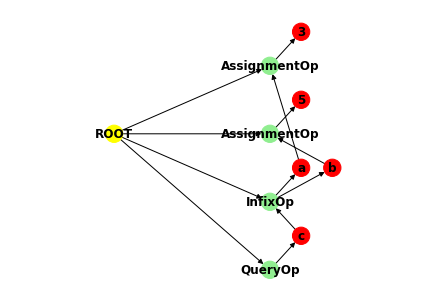

In [10]:
color_map = [G.nodes[node_id]['color'] for node_id in G] 
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map, pos=pos, labels=labels)
plt.margins(x=0.4)

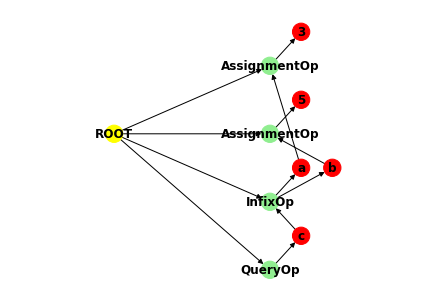

In [13]:
prog.visualize_graph(show_ids=False)

In [ ]:
matched_ids = prog.get_node_ids_for(identifier_name='c')
prog.get_dependency_tree(node_id=matched_ids[0])

In [14]:
prog.get_attention_weights_for("c")

[0.25, 0.25, 0.75, 1.0]

In [18]:
min([3, 4])

3

In [ ]:
from networkx import descendants_at_distance
records = []

relevant_node_id = 112504471

for d_distance in range(10):
    decscendants_at_distance_d = descendants_at_distance(
        G, source=relevant_node_id, distance=d_distance
    )
    for descendant in decscendants_at_distance_d:
        records.append({
            "node_id": descendant,
            "depth": d_distance,
            "line_number": G.nodes[descendant]["line"]
        })

print(records)

In [ ]:
G.nodes[112504471]["line"]

In [ ]:
counter_dict = {}
pos = {}

for node_id in G:
    line = G.nodes[node_id]['line']
    
    current_counter = counter_dict.get(line, 0)
    counter_dict[line] = current_counter + 1
    n_occurrence = current_counter
    pos[node_id] = [n_occurrence, -line + (0.1) * n_occurrence]

In [ ]:
labels = nx.get_node_attributes(G, 'label')

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map, pos=pos, labels=labels)
plt.margins(x=0.4)

# First example

In [21]:
import torch
prog = torch.load("../data/ground_truth_attention/exp_v05/var_0 = 545.pt")

In [ ]:
"attendable_parts": [
    "var_0 = 545", 1
    "var_1 = 998",
    "var_2 = 291",
    "var_3 = 206", 1
    "derived_0 = var_3 + var_0", 1
    "derived_1 = var_0 * var_2",
    "derived_2 = var_2 / var_0",
    "derived_3 = var_3 - derived_0",
    "derived_4 = var_2 * var_3",
    "if (derived_0 == " 1
],
"attention_level": "line",
"attention_weights": [
    0.25,
    0,
    0,
    0.25,
    0.75,
    0,
    0.5,
    0,
    0.5,
    1.0
],

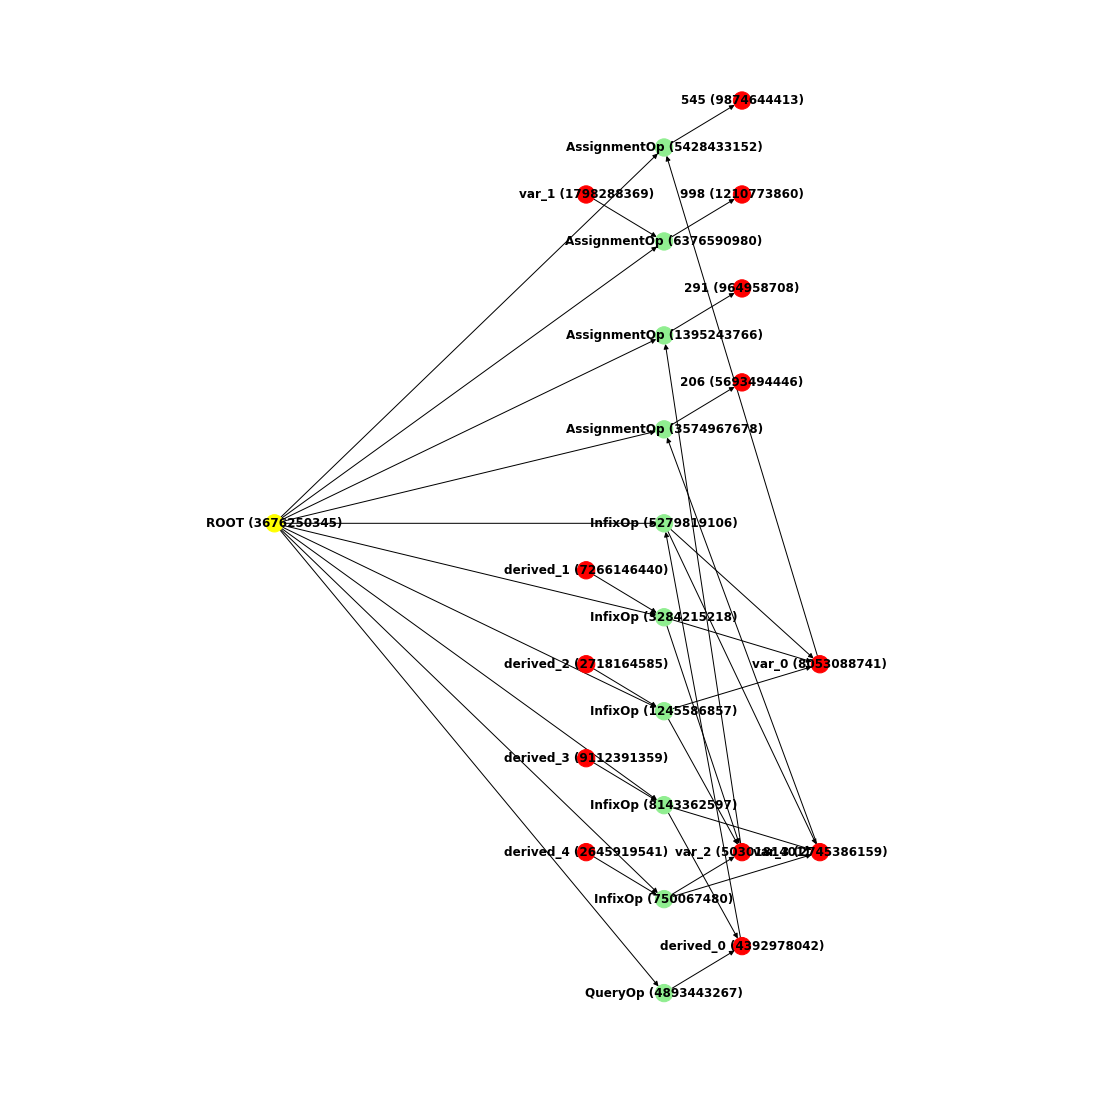

In [29]:
prog.visualize_graph(show_ids=True)

In [37]:
prog.get_attention_weights_for(4392978042)

related_nodes: [{'node_id': 4392978042, 'depth': 0, 'line_number': 10}, {'node_id': 5279819106, 'depth': 1, 'line_number': 5}, {'node_id': 8053088741, 'depth': 2, 'line_number': 7}, {'node_id': 2745386159, 'depth': 2, 'line_number': 9}, {'node_id': 5428433152, 'depth': 3, 'line_number': 1}, {'node_id': 3574967678, 'depth': 3, 'line_number': 4}, {'node_id': 9874644413, 'depth': 4, 'line_number': 1}, {'node_id': 5693494446, 'depth': 4, 'line_number': 4}]
on line: 1
there are the following nodes: [{'node_id': 5428433152, 'depth': 3, 'line_number': 1}, {'node_id': 9874644413, 'depth': 4, 'line_number': 1}]
on line: 2
there are the following nodes: []
on line: 3
there are the following nodes: []
on line: 4
there are the following nodes: [{'node_id': 3574967678, 'depth': 3, 'line_number': 4}, {'node_id': 5693494446, 'depth': 4, 'line_number': 4}]
on line: 5
there are the following nodes: [{'node_id': 5279819106, 'depth': 1, 'line_number': 5}]
on line: 6
there are the following nodes: []
on l

[0.25, 0, 0, 0.25, 0.75, 0, 0.5, 0, 0.5, 1.0]

In [32]:
prog.get_dependency_tree(4392978042)

[{'node_id': 4392978042, 'depth': 0, 'line_number': 10},
 {'node_id': 5279819106, 'depth': 1, 'line_number': 5},
 {'node_id': 8053088741, 'depth': 2, 'line_number': 7},
 {'node_id': 2745386159, 'depth': 2, 'line_number': 9},
 {'node_id': 5428433152, 'depth': 3, 'line_number': 1},
 {'node_id': 3574967678, 'depth': 3, 'line_number': 4},
 {'node_id': 9874644413, 'depth': 4, 'line_number': 1},
 {'node_id': 5693494446, 'depth': 4, 'line_number': 4}]

In [34]:
nx.descendants_at_distance(prog.G, source=4392978042, distance=1)

{5279819106}

In [35]:
nx.descendants_at_distance(prog.G, source=4392978042, distance=2)

{2745386159, 8053088741}

In [36]:
nx.descendants_at_distance(prog.G, source=4392978042, distance=3)

{3574967678, 5428433152}

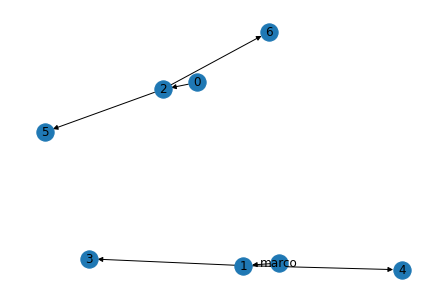

In [38]:
import networkx as nx
H = nx.DiGraph()
H.add_edges_from([("marco", 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)])

nx.draw(H, with_labels=True)

In [27]:
nx.descendants_at_distance(H, source=4, distance=2)

set()

In [ ]:
    >>> nx.descendants_at_distance(H, 5, 0)
    {5}
    >>> nx.descendants_at_distance(H, 5, 1)

## Second Example

In [68]:
import torch
prog = torch.load("../attwizard/creators/test_assets/simple_derived_program.pt")

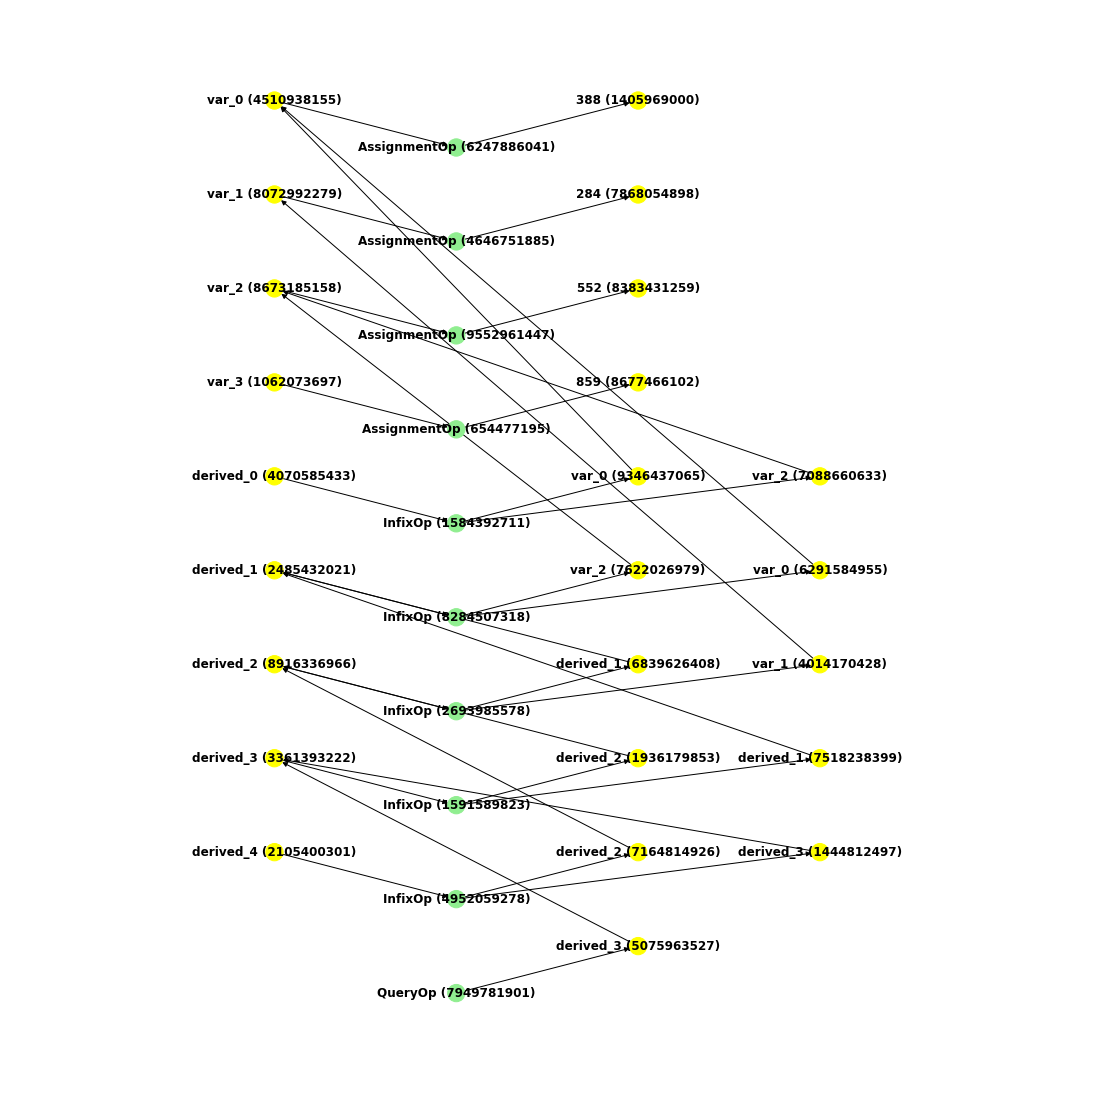

In [71]:
prog.visualize_graph(show_ids=True)

In [70]:
last_node = prog.operations[-1].input_nodes[0]
target_node = last_node
prompt_text = prog.get_full_output()
print(prompt_text)

att_weights = prog.get_attention_weights_for(
    identifier=target_node.id,
    distance_fn=convert_distance_to_weight_naive)
print(att_weights)

var_0 = 388
var_1 = 284
var_2 = 552
var_3 = 859
derived_0 = var_0 - var_2
derived_1 = var_2 + var_0
derived_2 = derived_1 * var_1
derived_3 = derived_2 + derived_1
derived_4 = derived_2 / derived_3
if (derived_3 == 

[0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0, 0, 0.5555555555555556, 0.5555555555555556, 0.8888888888888888, 0, 1.0]


# Run creation routine

In [21]:
from attwizard.script.utils import read_config_file
import yaml
import click
import random
from pathlib import Path
from typing import List, Dict, Any
import json

from attwizard.creators.assignement_chain import AssignmentChainCreator

In [22]:
config = read_config_file("../config/exp_v05.yaml")

In [23]:
prompt_folder = config.get('input_data_folder', None)
ground_truth_folder = config.get('ground_truth_folder', None)
# make sure the output folder exists
Path(prompt_folder).mkdir(parents=True, exist_ok=True)
Path(ground_truth_folder).mkdir(parents=True, exist_ok=True)
# if there are files already ask if they should be overwritten
if len(list(Path(prompt_folder).glob("*.txt"))) > 0:
    click.echo("There are already files in the folder. Overwrite?")
    if not click.confirm("Do you want to overwrite?"):
        click.echo("Aborting.")

In [52]:
strategy = config.get('prompt_creation_strategy', None)
click.echo(f"Creating prompts with {strategy['name']} strategy.")

random.seed(42)

assert strategy['type'] == 'creator'

if strategy['name'] == 'assignment_chain':
    creator = AssignmentChainCreator(
        name=strategy['name'],
        prompt_folder=prompt_folder,
        ground_truth_folder=ground_truth_folder,
        n_prompts=strategy['n_prompts'],
        attention_level=strategy['attention_level'],
        kwargs=strategy['kwargs'])

creator.create_prompts()

Creating prompts with assignment_chain strategy.
existing_output_nodes:  ['var_0', 'var_1', 'var_2', 'var_3']
Input nodes:  ['var_1', 'var_2']
existing_output_nodes:  ['var_0', 'var_1', 'var_2', 'var_3', 'derived_0']
Input nodes:  ['var_2', 'derived_0']
existing_output_nodes:  ['var_0', 'var_1', 'var_2', 'var_3', 'derived_0', 'derived_1']
Input nodes:  ['derived_0', 'var_2']
existing_output_nodes:  ['var_0', 'var_1', 'var_2', 'var_3', 'derived_0', 'derived_1', 'derived_2']
Input nodes:  ['var_0', 'var_1']
existing_output_nodes:  ['var_0', 'var_1', 'var_2', 'var_3', 'derived_0', 'derived_1', 'derived_2', 'derived_3']
Input nodes:  ['derived_0', 'derived_1']
op: =:
- INPUT: 25
- OUTPUT: var_0

all_connected_nodes: ['25', 'var_0']
op: =:
- INPUT: 104
- OUTPUT: var_1

all_connected_nodes: ['104', 'var_1']
op: =:
- INPUT: 223
- OUTPUT: var_2

all_connected_nodes: ['223', 'var_2']
op: =:
- INPUT: 733
- OUTPUT: var_3

all_connected_nodes: ['733', 'var_3']
op: var_1 / var_2
all_connected_nodes

> /home/eaftan/copilot-attention/attwizard/creators/dep_graph.py(373)add_node_and_connect_to_alias()
    371                     i_neighbour = str(i_neighbour)
    372                     print(G.nodes[i_neighbour])
--> 373                     if (G.nodes[i_neighbour]["type"] == "OPERATOR") and \
    374                             (G.nodes[i_neighbour]["subtype"] == "AssignmentOp"):
    375                         is_def_alias = True

ipdb> prog.visualize_graph(show_ids=True)
*** NameError: name 'prog' is not defined
ipdb> nx.draw(G)
ipdb> G.nodes
NodeView(('7115217606', '1210134806', 1210134806, '7963398513', '3708720931', '8689524749', 8689524749, '3794702609', '4982038516', '6527071533', 6527071533, '6877097785', '4634460727', '7118083550', 7118083550, '8967135650', '1539175254', '8324067146', 8324067146, '4982038516_1', '4982038516_4982038516', '1539175254_1', '1539175254_1539175254', '8303348681', '3125779361', 3125779361))
ipdb> i_neighbour
'1539175254_1539175254'
ipdb> q


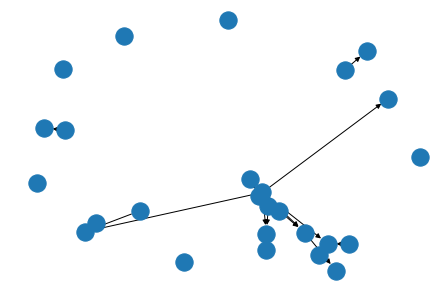

In [50]:
%debug